In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rawdata = pd.read_csv("kc_house_data.csv")

In [3]:
ones = pd.DataFrame(np.ones((rawdata.shape[0],1)),columns=["bias"])

In [4]:
rawdata = pd.concat([rawdata,ones],axis=1)

In [5]:
rawdata.shape

(21613, 22)

In [6]:
rawdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bias
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1.0


In [7]:
rawdata['bias']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
        ... 
21583    1.0
21584    1.0
21585    1.0
21586    1.0
21587    1.0
21588    1.0
21589    1.0
21590    1.0
21591    1.0
21592    1.0
21593    1.0
21594    1.0
21595    1.0
21596    1.0
21597    1.0
21598    1.0
21599    1.0
21600    1.0
21601    1.0
21602    1.0
21603    1.0
21604    1.0
21605    1.0
21606    1.0
21607    1.0
21608    1.0
21609    1.0
21610    1.0
21611    1.0
21612    1.0
Name: bias, Length: 21613, dtype: float64

In [8]:
droppedrawdata = rawdata.drop(['id','date','waterfront','view','yr_built','yr_renovated','zipcode','lat'],axis=1,inplace=False)

In [9]:
droppedrawdata.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,long,sqft_living15,sqft_lot15,bias
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,-122.257,1340,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,-122.319,1690,7639,1.0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,-122.233,2720,8062,1.0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,-122.393,1360,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,-122.045,1800,7503,1.0


In [10]:
droppedrawdata.shape

(21613, 14)

In [11]:
trainingdatasize = int(0.75*droppedrawdata.shape[0])

In [12]:
trainingdatasize

16209

In [13]:
trainingdata = droppedrawdata.iloc[0:trainingdatasize,:]

In [14]:
trainingdata = np.array(trainingdata)

In [15]:
trainingdata = trainingdata/ trainingdata.max(axis = 0)

In [16]:
trainingdata = pd.DataFrame(trainingdata)

In [17]:
testingdata = droppedrawdata.iloc[trainingdatasize:,:]

In [18]:
trainingdata.shape

(16209, 14)

In [19]:
testingdata.shape

(5404, 14)

In [20]:
trainingdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.028818,0.090909,0.12500,0.087149,0.003421,0.285714,0.6,0.538462,0.125399,0.000000,1.007765,0.219313,0.006485,1.0
1,0.069870,0.090909,0.28125,0.189808,0.004385,0.571429,0.6,0.538462,0.230606,0.082988,1.008276,0.276596,0.008768,1.0
2,0.023377,0.060606,0.12500,0.056869,0.006056,0.285714,0.6,0.461538,0.081828,0.000000,1.007567,0.445172,0.009254,1.0
3,0.078442,0.121212,0.37500,0.144756,0.003028,0.285714,1.0,0.538462,0.111583,0.188797,1.008886,0.222586,0.005739,1.0
4,0.066234,0.090909,0.25000,0.124077,0.004893,0.285714,0.6,0.615385,0.178533,0.000000,1.006017,0.294599,0.008612,1.0


In [21]:
labels = trainingdata[0]  #price column = 0

In [22]:
inputtrainingdata = trainingdata.drop([0],axis=1,inplace=False)

In [23]:
inputtrainingdata.shape

(16209, 13)

In [24]:
inputtrainingdata.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.090909,0.12500,0.087149,0.003421,0.285714,0.6,0.538462,0.125399,0.000000,1.007765,0.219313,0.006485,1.0
1,0.090909,0.28125,0.189808,0.004385,0.571429,0.6,0.538462,0.230606,0.082988,1.008276,0.276596,0.008768,1.0
2,0.060606,0.12500,0.056869,0.006056,0.285714,0.6,0.461538,0.081828,0.000000,1.007567,0.445172,0.009254,1.0
3,0.121212,0.37500,0.144756,0.003028,0.285714,1.0,0.538462,0.111583,0.188797,1.008886,0.222586,0.005739,1.0
4,0.090909,0.25000,0.124077,0.004893,0.285714,0.6,0.615385,0.178533,0.000000,1.006017,0.294599,0.008612,1.0


We are going to create a Neural Network having two hidden layers and 0th Layer consists of 12 dimensional feature vector. 1st Layer(1st Hidden Layer) consists of 12 neurons. 2nd Layer(2nd Hidden Layer) consists of 12 neurons. The output layer(3rd Layer) consists of a single neuron outputting the result of the prediction.   

As there are 12 neurons in the first layer of the neural network and Each neuron in the first hidden layer is accepting Activations from all the neurons of the input layer(values of a 12 dimensional feature vector which we are going to name as 'Activations1' in our code). So, for each neuron in the first hidden layer, we will be having 12 synaptic weights. Therefore, if we put the synaptic weights of received activations of one neuron in first hidden layer vertically (a column) and stack them up horizontally from left to right, we get synaptic weight matrix of 12X12. We are going to name that matrix as 'Theta1old' in our code. So, our matrix is going to be: 

$\theta^{[1]}_{old} = \begin{bmatrix}\theta^{[1]}_{0 old} & \theta^{[1]}_{1 old}\cdots & \theta^{[1]}_{j old}\cdots & \theta^{[1]}_{11 old}\end{bmatrix}$

Where, 

$\theta^{[1]}_{j old} = \begin{bmatrix}\theta^{[1]}_{0j old} \\ \theta^{[1]}_{1j old} \\ \theta^{[1]}_{2j old} \\ \theta^{[1]}_{3j old} \\ \theta^{[1]}_{4j old} \\ \theta^{[1]}_{5j old} \\ \theta^{[1]}_{6j old} \\ \theta^{[1]}_{7j old} \\ \theta^{[1]}_{8j old} \\ \theta^{[1]}_{9j old} \\ \theta^{[1]}_{10j old} \\ \theta^{[1]}_{11j old}\end{bmatrix}$

for any jth neuron in the first hidden layer, [1] 

Therefore, 

$\theta^{[1]}_{old} = \begin{bmatrix}\theta^{[1]}_{0 old} & \theta^{[1]}_{1 old}\cdots & \theta^{[1]}_{j old}\cdots & \theta^{[1]}_{11 old}\end{bmatrix} = \begin{bmatrix}\theta^{[1]}_{00 old} & \theta^{[1]}_{01 old}\cdots & \theta^{[1]}_{0jold}\cdots & \theta^{[1]}_{011 old} \\ \theta^{[1]}_{10 old} \\ \theta^{[1]}_{i0 old} \\ \cdots \\ \theta^{[1]}_{110 old} & \theta^{[1]}_{111 old} & \cdots & \theta^{[1]}_{11j old} \cdots & \theta^{[1]}_{1111 old}\end{bmatrix}$

In [25]:
def Activationfunction(x):
    
    #return 1/(1+np.exp(-x))
    return x

In [26]:
def ForwardpassActivations(featurevector,thetas):
    
    Activations1 = Activationfunction(np.matmul(featurevector,thetas[0]))
    Activations2 = Activationfunction(np.matmul(Activations1,thetas[1]))
    Activation3op = Activationfunction(np.matmul(Activations2,thetas[2]))
    
    return [featurevector,Activations1,Activations2,Activation3op]

In [33]:
Theta1old = np.random.randn(13,inputtrainingdata.shape[1])
Theta2old = np.random.randn(13,13)
Theta3old = np.random.randn(13,1)

Lossfunctionvalues = []
iterations = []

alpha = 0.0001
batchsize = 500
epochs = 10000

for i in range(0,epochs):
    
    thetasold = [Theta1old,Theta2old,Theta3old]
    
    batchindices = np.random.randint(low=0,high=trainingdatasize,size=batchsize)
    inputdatainepoch = np.array(inputtrainingdata.iloc[batchindices])
    Forwardpassresults = ForwardpassActivations(inputdatainepoch,thetasold)
    
    #print(Forwardpassresults[0].shape,Forwardpassresults[1].shape,Forwardpassresults[2].shape,Forwardpassresults[3].shape)
    
    Error = Forwardpassresults[3] - np.array(labels[batchindices])
    Lossfunctionvalue = 0.5*np.mean((Error**2))
    bproperror = np.mean(Error)
    
    Lossfunctionvalues.append(Lossfunctionvalue)
    iterations.append((i+1))
    
    #print(Lossfunctionvalue)
    
    Delforward1 = np.mean(Forwardpassresults[0],axis=0)
    Delforward2 = np.mean(Forwardpassresults[1],axis=0)
    Delforward3 = np.mean(Forwardpassresults[2],axis=0)
    
    Delforward1 = Delforward1.reshape(13,1)
    Delforward2 = Delforward2.reshape(13,1)
    Delforward3 = Delforward3.reshape(13,1)
    #print(Delforward1.shape,Delforward2.shape,Delforward3.shape)
    #print(Theta3old.shape,Delreverse3.shape,Delreverse3)
    
    Delreverse3 = bproperror
    Delreverse3 = Delreverse3.reshape(1,1)
    #print(Delreverse3)
    Delreverse2 = np.matmul(Theta3old,Delreverse3)
    #Delreverse2 = Theta3old*Delreverse3
    Delreverse1 = np.matmul(Theta2old,Delreverse2)
    
    #print([Delreverse3.shape,Delforward3.shape], [Delreverse2.shape,Delforward2.shape], [Delreverse1.shape,Delforward1.shape])
    
    #Delforward3 = Delforward3.reshape(13,1)
    #Delreverse3 = Delreverse3.reshape(1,1)
    
    Theta3new = Theta3old - alpha*(np.matmul(Delforward3,Delreverse3))
    Theta2new = Theta2old - alpha*(np.matmul(Delreverse2,Delforward2.T))
    Theta1new = Theta1old - alpha*(np.matmul(Delreverse1,Delforward1.T))
    
    Theta1old = Theta1new
    Theta2old = Theta2new
    Theta3old = Theta3new
    
   # print("The value of the Loss Function at iteration number {} is {}".format((i+1),Lossfunctionvalue))

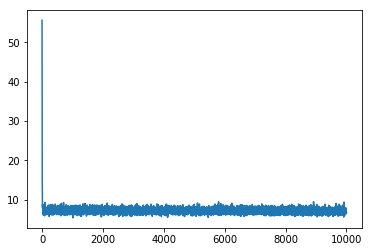

In [34]:
plt.plot(iterations,Lossfunctionvalues)

In [35]:
print("The value of the Loss Function at iteration number {} is {}".format((i+1),Lossfunctionvalue))

The value of the Loss Function at iteration number 10000 is 6.771012235293609
